#     RESULTS OF THE  SET OF SIMULATIONS

## Loading results

In [1]:
%matplotlib notebook

In [2]:
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

from thermalspin.data_analysis  import *

In [3]:
# Insert here the name of the simulation set
setname = "ferro_set"

In [4]:
final_state_lst, L_lst, t_lst, J_lst, D_lst, h_lst, T_lst, E_lst, m_lst, snp_lst = load_set_results(setname)

In [5]:
L, T, t_whole, J_whole, D_whole, h_whole, E_whole, m_whole, final_state, snp = \
arrange_set_results_LT(L_lst, t_lst, J_lst, D_lst, h_lst, T_lst, E_lst, m_lst, final_state_lst)
L_num = t_whole.shape[0]
T_num = t_whole.shape[1]
t_num = t_whole.shape[2]

## Global behaviour

<IPython.core.display.Javascript object>


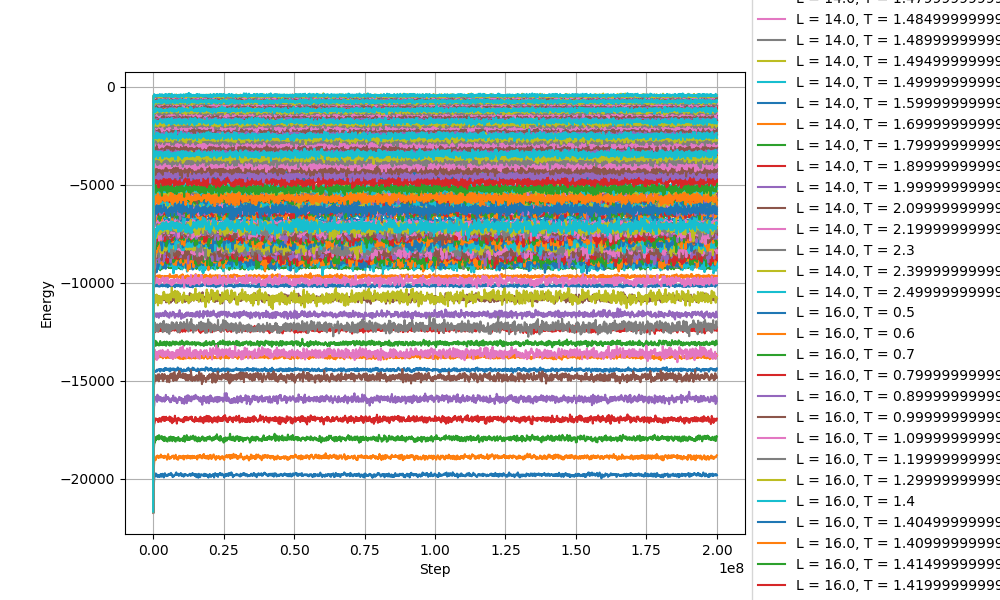

In [6]:
fig = plt.figure(figsize=(10,6))
ax = plt.subplot(111)
for i,j in np.ndindex(L_num, T_num):
    ax.plot(t_whole[i,j], E_whole[i,j], label=f"L = {L[i]}, T = {T[j]}")
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("Step")
plt.ylabel("Energy")
plt.grid()
plt.show()

In [7]:
m_magnitude_whole = np.sqrt(np.sum(m_whole**2, axis = 3))

<IPython.core.display.Javascript object>


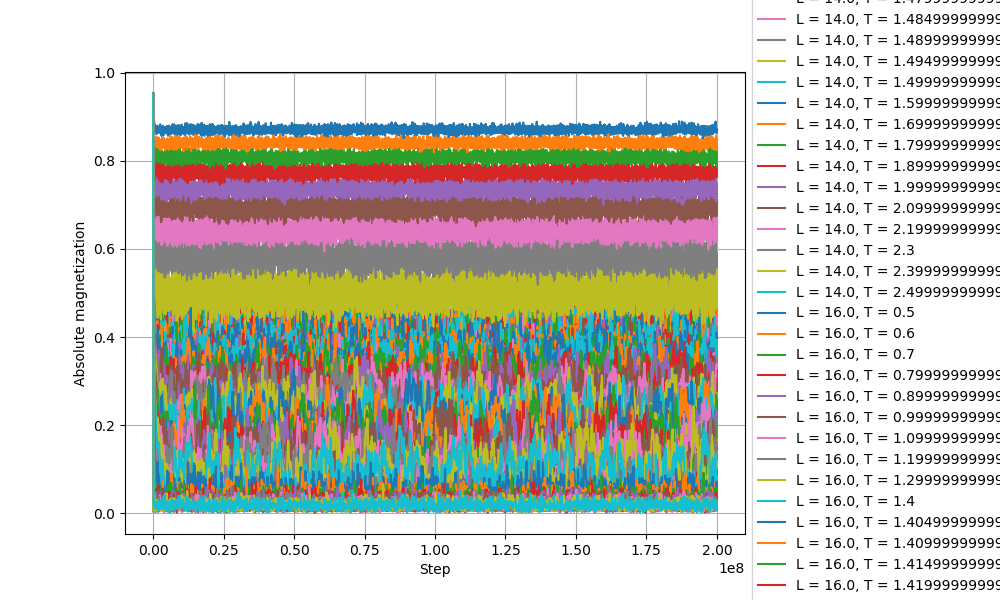

In [8]:
fig = plt.figure(figsize=(10,6))
ax = plt.subplot(111)
for i,j in np.ndindex(L_num, T_num):
    ax.plot(t_whole[i,j], m_magnitude_whole[i,j], label=f"L = {L[i]}, T = {T[j]}")
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("Step")
plt.ylabel("Absolute magnetization")
plt.grid()
plt.show()

## Single ensemble analysis

In [9]:
# Insert here index of the ensemble to be analyzed 
L_idx = 0
T_idx = 4

<IPython.core.display.Javascript object>


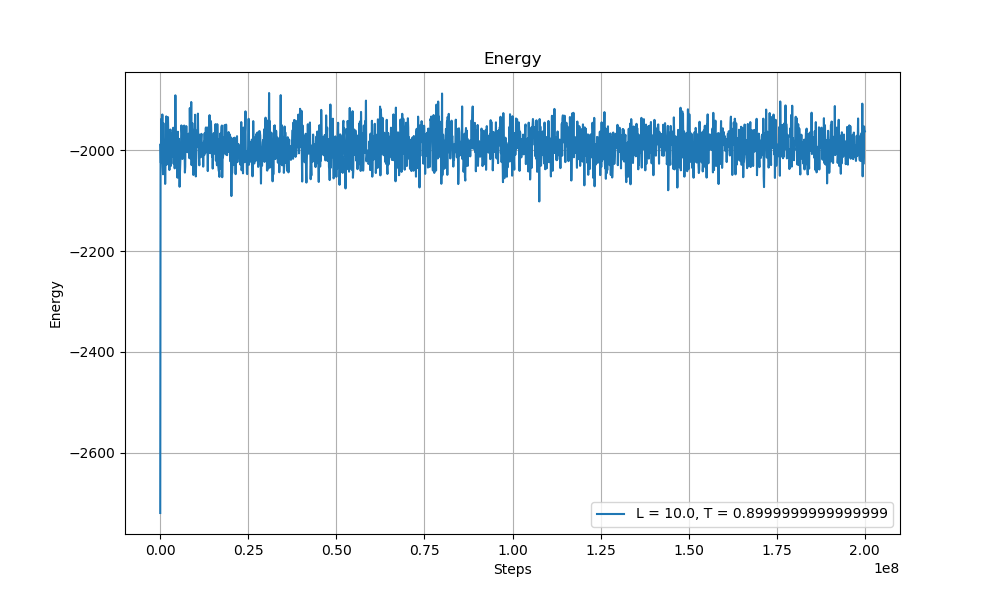

In [10]:
fig = plt.figure(figsize=(10,6))
ax = plt.subplot(111)
ax.plot(t_whole[L_idx, T_idx], E_whole[L_idx, T_idx], label=f"L = {L[L_idx]}, T = {T[T_idx]}")
ax.legend()
plt.ylabel("Energy")
plt.xlabel("Steps")
plt.title("Energy")
plt.grid()
plt.show()

<IPython.core.display.Javascript object>


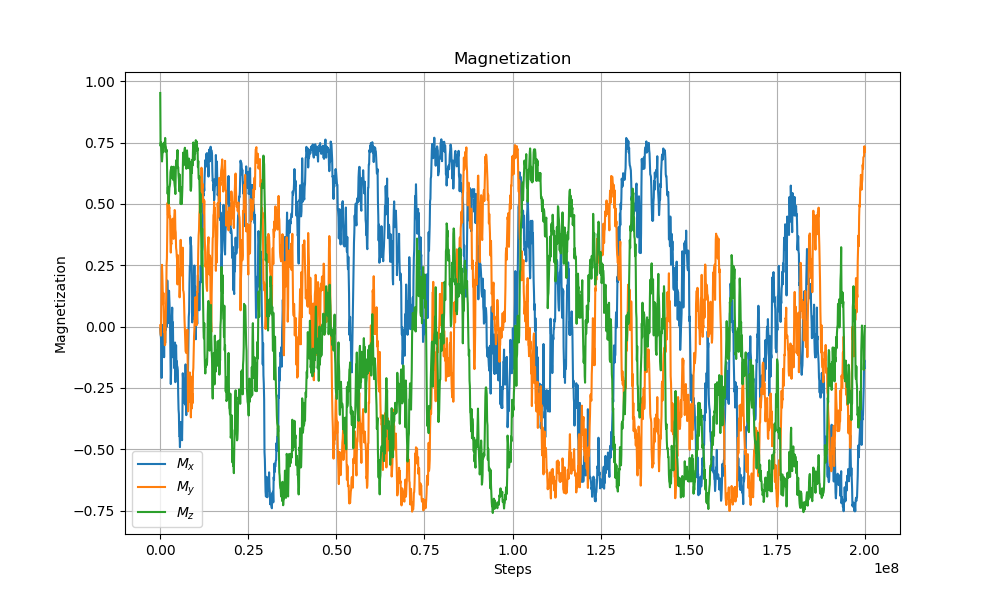

In [11]:
fig = plt.figure(figsize=(10,6))
ax = plt.subplot(111)
ax.plot(t_whole[L_idx, T_idx], m_whole[L_idx, T_idx, :, 0], label = r"$M_x$")
ax.plot(t_whole[L_idx, T_idx], m_whole[L_idx, T_idx, :, 1], label = r"$M_y$")
ax.plot(t_whole[L_idx, T_idx], m_whole[L_idx, T_idx, :, 2], label = r"$M_z$")
plt.legend()
plt.ylabel("Magnetization")
plt.xlabel("Steps")
plt.title("Magnetization")
plt.grid()
plt.show()

<IPython.core.display.Javascript object>


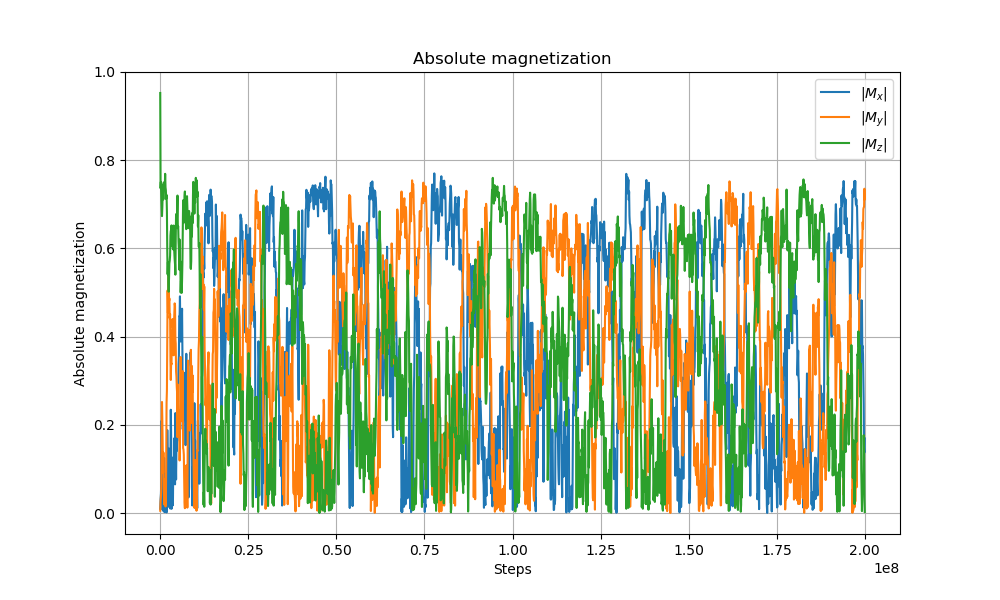

In [12]:
fig = plt.figure(figsize=(10,6))
ax = plt.subplot(111)
ax.plot(t_whole[L_idx, T_idx], np.abs(m_whole[L_idx, T_idx, :, 0]), label = r"$|M_x|$")
ax.plot(t_whole[L_idx, T_idx], np.abs(m_whole[L_idx, T_idx, :, 1]), label = r"$|M_y|$")
ax.plot(t_whole[L_idx, T_idx], np.abs(m_whole[L_idx, T_idx, :, 2]), label = r"$|M_z|$")
plt.legend()
plt.ylabel("Absolute magnetization")
plt.xlabel("Steps")
plt.title("Absolute magnetization")
plt.grid()
plt.show()

<IPython.core.display.Javascript object>


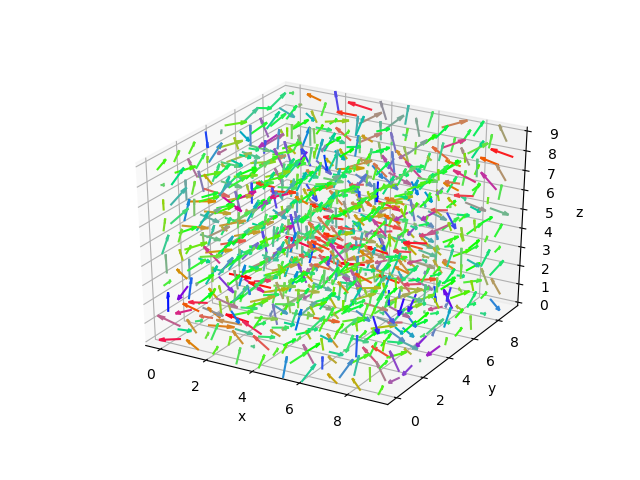

In [13]:
fig = plot_state(final_state[L_idx][T_idx])
fig.show()

<IPython.core.display.Javascript object>


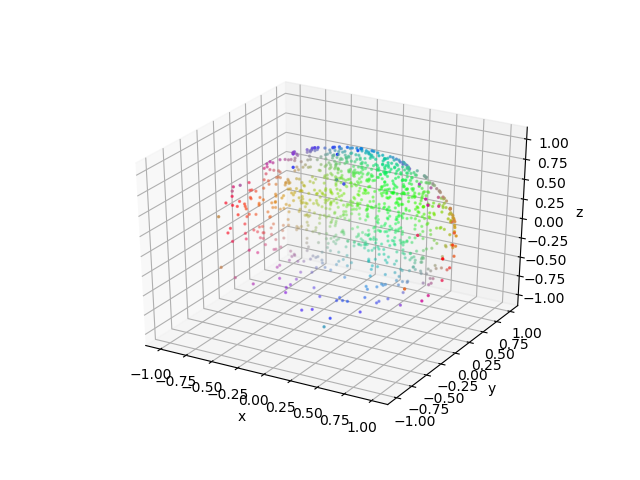

In [14]:
fig = plot_spin_directions(final_state[L_idx][T_idx])
fig.show()

## System results

In [15]:
# SELECT WARMUP PERIOD TO LAST UNTIL STEP NUMBER warmup_final_step
warmup_end = 0.5e7
warmup_final_idx = np.argmax(np.equal(t_whole[0,0], warmup_end))
#t_final = 0.5e8
#final_idx = np.argmax(np.equal(t_whole[0,0], t_final))
final_idx=-1
t = t_whole[:, :, warmup_final_idx:final_idx]
E = E_whole[:, :, warmup_final_idx:final_idx]
m = m_whole[:, :, warmup_final_idx:final_idx]

In [16]:
E_mean = np.mean(E, axis=2)
E_std = np.sqrt(np.var(E, axis=2))

e_mean = np.zeros(shape=E_mean.shape)
e_std = np.zeros(shape=E_std.shape)
for i in range(L_num):
    e_mean[i] = E_mean[i]/L[i]**3
    e_std[i] = E_std[i]/L[i]**3

<IPython.core.display.Javascript object>


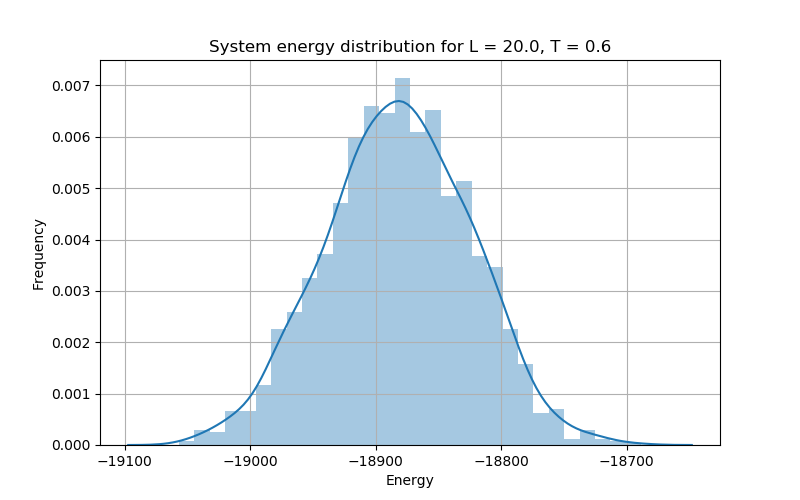

/home/skdys/app/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [17]:
L_idx = -1
T_idx = 1

fig = plt.figure(figsize=(8,5))
E_tbp=E[L_idx,T_idx]
#E_tbp = E_tbp[E_tbp>-1e4]
sns.distplot(E_tbp)
plt.xlabel("Energy")
plt.ylabel("Frequency")
plt.title(f"System energy distribution for L = {L[L_idx]}, T = {str(T[T_idx])}")
plt.grid()
plt.show()
fig.savefig("./plots/"+setname+"_distribution_test.svg")

### Mean energy

<IPython.core.display.Javascript object>


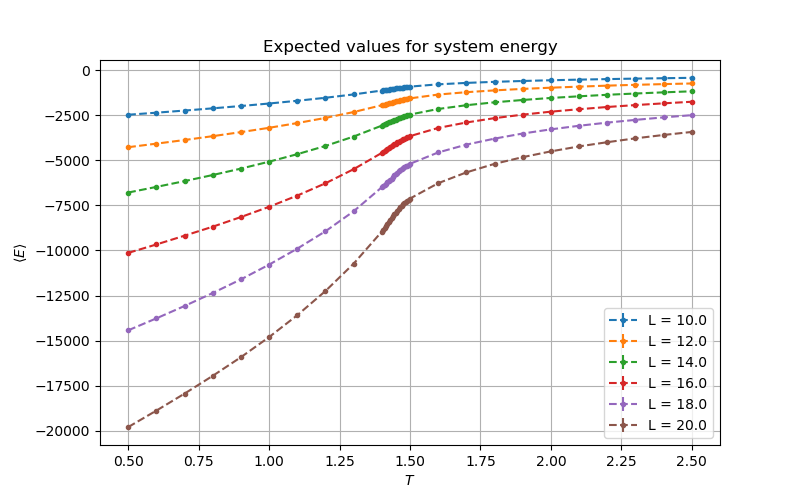

In [18]:
fig = plt.figure(figsize=(8,5))
ax = plt.subplot(111)
for i in np.ndindex(L_num):
    ax.errorbar(T, E_mean[i], yerr=E_std[i]/2, fmt="--.", label=f"L = {L[i]}")
box = ax.get_position()
ax.legend()
plt.title("Expected values for system energy")
plt.xlabel(r"$T$")
plt.ylabel(r"$\langle E \rangle$")
plt.grid()
plt.show()
fig.savefig("./plots/"+setname+"_system_energy.svg")

<IPython.core.display.Javascript object>


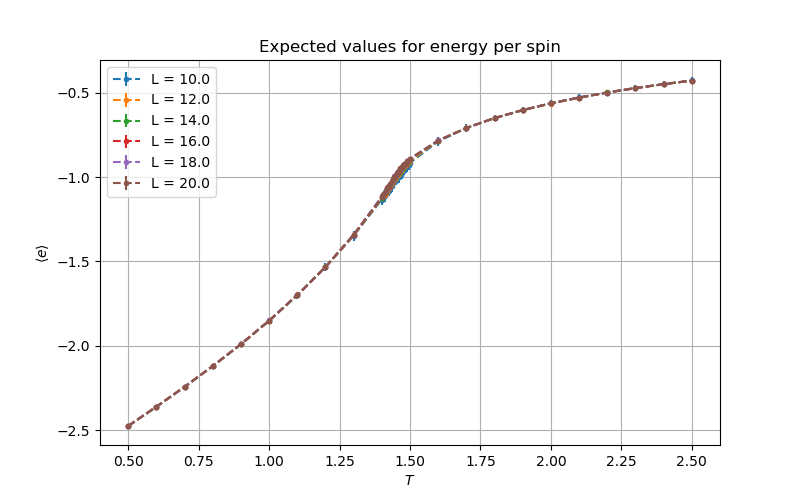

In [19]:
fig = plt.figure(figsize=(8,5))
ax = plt.subplot(111)
for i in np.ndindex(L_num):
    ax.errorbar(T, e_mean[i], yerr=e_std[i]/2, fmt="--.", label=f"L = {L[i]}")
box = ax.get_position()
ax.legend()
plt.title("Expected values for energy per spin")
plt.xlabel(r"$T$")
plt.ylabel(r"$\langle e \rangle$")
plt.grid()
plt.show()
fig.savefig("./plots/"+setname+"_energy_per_spin.svg")

### Mean magnetization magnitude

In [20]:
m_mean = np.mean(m, axis=2)
m_std = np.sqrt(np.var(m, axis=2))
m_magnitude = np.sqrt(np.sum(m**2, axis = 3))
m_magnitude_mean = np.mean(m_magnitude, axis=2)
m_magnitude_std = np.sqrt(np.var(m_magnitude, axis=2))

<IPython.core.display.Javascript object>


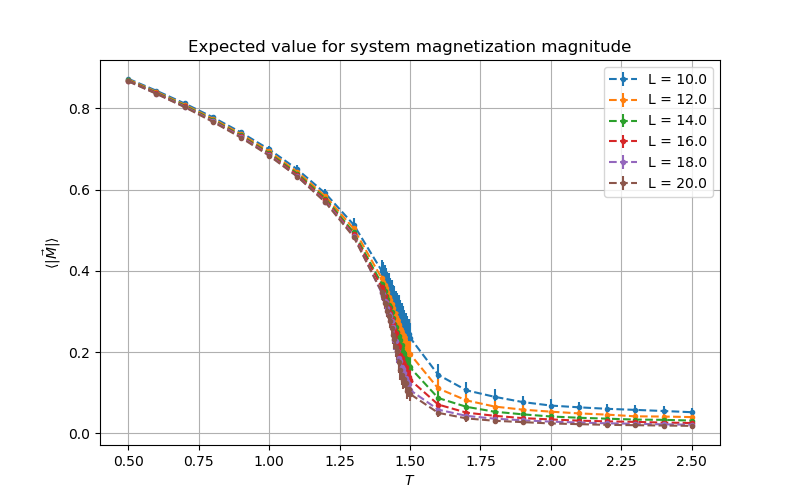

In [21]:
fig = plt.figure(figsize=(8,5))
ax = plt.subplot(111)
for i in np.ndindex(L_num):
    ax.errorbar(T, m_magnitude_mean[i], yerr=m_magnitude_std[i]/2,fmt="--.", label=f"L = {L[i]}")
box = ax.get_position()
ax.legend()
plt.xlabel(r"$T$")
plt.ylabel(r"$\langle | \vec{M} | \rangle$")
plt.grid()
plt.title("Expected value for system magnetization magnitude")
plt.show()
fig.savefig("./plots/"+setname+"_magnetization_magnitude.svg")

### Heat capacity

In [22]:
E_var = np.var(E, axis=2)

In [23]:
cv = np.zeros(shape=(L_num, T_num))
for i in np.ndindex(L_num):
    cv[i] = E_var[i]/T**2/L[i]**3

<IPython.core.display.Javascript object>


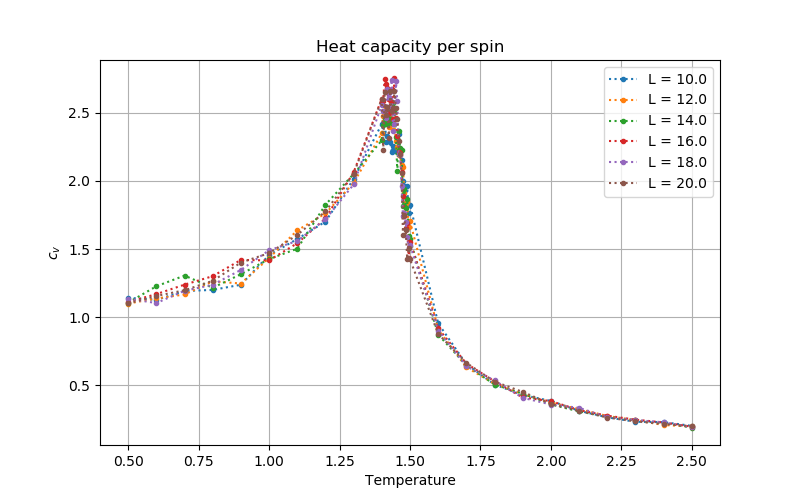

In [24]:
fig = plt.figure(figsize=(8,5))
ax = plt.subplot(111)
for i in np.ndindex(L_num):
    ax.plot(T, cv[i], ":.", label=f"L = {L[i]}")
box = ax.get_position()
ax.legend()
plt.xlabel("Temperature")
plt.ylabel(r"$c_v$")
plt.title("Heat capacity per spin")
plt.grid()
plt.show()
fig.savefig("./plots/"+setname+"_heat_capacity.svg")

### Suscpetibility

In [25]:
Tc_idx   = np.argmax(T>1.444)
T_nc_max = np.argmax(T>1.5)
T_nc_min = np.argmax(T>1.3)

T_dis = T[Tc_idx:]
T_ord = T[:Tc_idx]
T_dis_nc = T[Tc_idx:T_nc_max]
T_ord_nc = T[T_nc_min:Tc_idx]

In [26]:
def cov(X,i,j):
    X_mean = np.mean(X, axis=2)
    ret = np.zeros(shape=(L_num, T_num))
    for l,t in np.ndindex(L_num, T_num):
        ret[l,t] = np.mean((X[l,t,:,i]-X_mean[l,t,i])*(X[l,t,:,j]-X_mean[l,t,j]))
    return ret

In [27]:
chi_xx = np.zeros(shape=(L_num, T_num))
chi_yy = np.zeros(shape=(L_num, T_num))
chi_zz = np.zeros(shape=(L_num, T_num))
chi_xy = np.zeros(shape=(L_num, T_num))
chi_yz = np.zeros(shape=(L_num, T_num))
chi_zx = np.zeros(shape=(L_num, T_num))

for i in np.ndindex(L_num):
    chi_xx[i] = cov(m,0,0)[i]/T*L[i]**3
    chi_yy[i] = cov(m,1,1)[i]/T*L[i]**3
    chi_zz[i] = cov(m,2,2)[i]/T*L[i]**3
    chi_xy[i] = cov(m,0,1)[i]/T*L[i]**3
    chi_yz[i] = cov(m,1,2)[i]/T*L[i]**3
    chi_zx[i] = cov(m,2,0)[i]/T*L[i]**3

In [28]:
m_dis = m[:,Tc_idx:]
m_ord = m[:,:Tc_idx]

chi_xx_dis = chi_xx[:, Tc_idx:]
chi_yy_dis = chi_yy[:, Tc_idx:]
chi_zz_dis = chi_zz[:, Tc_idx:]
chi_xy_dis = chi_xy[:, Tc_idx:]
chi_yz_dis = chi_yz[:, Tc_idx:]
chi_zx_dis = chi_zx[:, Tc_idx:]

<IPython.core.display.Javascript object>


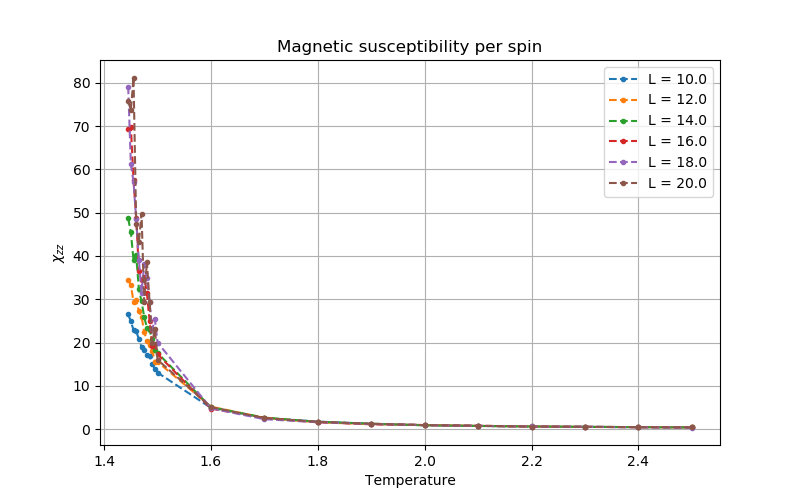

In [29]:
fig = plt.figure(figsize=(8,5))
ax = plt.subplot(111)
for i in np.ndindex(L_num):
    ax.plot(T[Tc_idx:], chi_zz[i][Tc_idx:], "--.", label=f"L = {L[i]}")
box = ax.get_position()
ax.legend()
plt.xlabel("Temperature")
plt.ylabel(r"$\chi_{zz}$")
plt.title("Magnetic susceptibility per spin")
plt.grid()
plt.show()
fig.savefig("./plots/"+setname+"_susceptibility.svg")

<IPython.core.display.Javascript object>


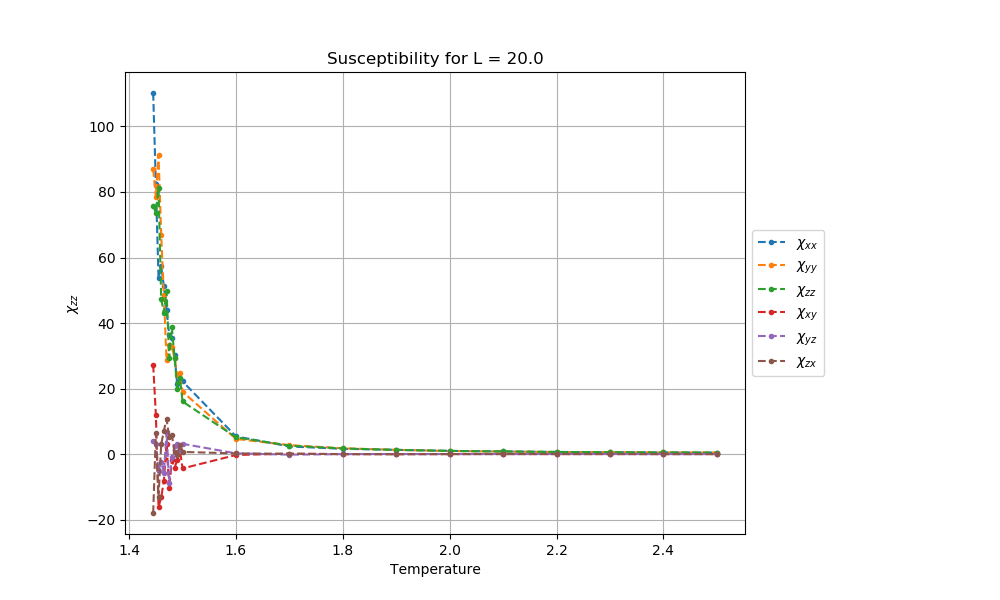

In [30]:
L_idx = -1

fig = plt.figure(figsize=(10,6))
ax = plt.subplot(111)
ax.plot(T_dis, chi_xx_dis[L_idx], ".--", label=r"$\chi_{xx}$")
ax.plot(T_dis, chi_yy_dis[L_idx], ".--", label=r"$\chi_{yy}$")
ax.plot(T_dis, chi_zz_dis[L_idx], ".--", label=r"$\chi_{zz}$")
ax.plot(T_dis, chi_xy_dis[L_idx], ".--", label=r"$\chi_{xy}$")
ax.plot(T_dis, chi_yz_dis[L_idx], ".--", label=r"$\chi_{yz}$")
ax.plot(T_dis, chi_zx_dis[L_idx], ".--", label=r"$\chi_{zx}$")
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("Temperature")
plt.ylabel(r"$\chi_{zz}$")
plt.title(f"Susceptibility for L = {L[L_idx]}")
plt.grid()
plt.show()
fig.savefig("./plots/"+setname+f"_L{L[L_idx]}_susceptibility.svg")

### Binder ratio

In [31]:
binder = 1 - (1/3)*np.mean(m_magnitude**4, axis=2)/(np.mean(m_magnitude**2, axis=2)**2)

<IPython.core.display.Javascript object>


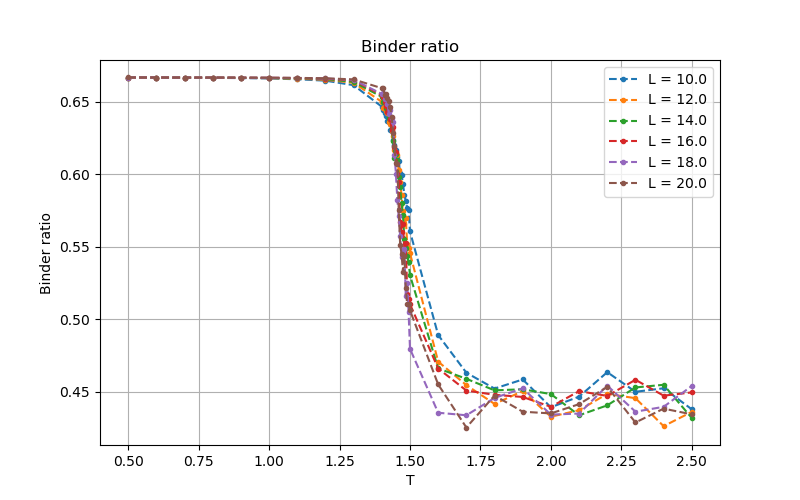

In [32]:
fig = plt.figure(figsize=(8,5))
ax = plt.subplot(111)
for i in np.ndindex(L_num):
    ax.plot(T, binder[i], '--.', label=f"L = {L[i]}")
box = ax.get_position()
ax.legend()
plt.ylabel(r"Binder ratio")
plt.xlabel(r"T")
plt.title("Binder ratio")
plt.grid()
plt.show()
fig.savefig("plots/"+setname+"_binder.svg")

<IPython.core.display.Javascript object>


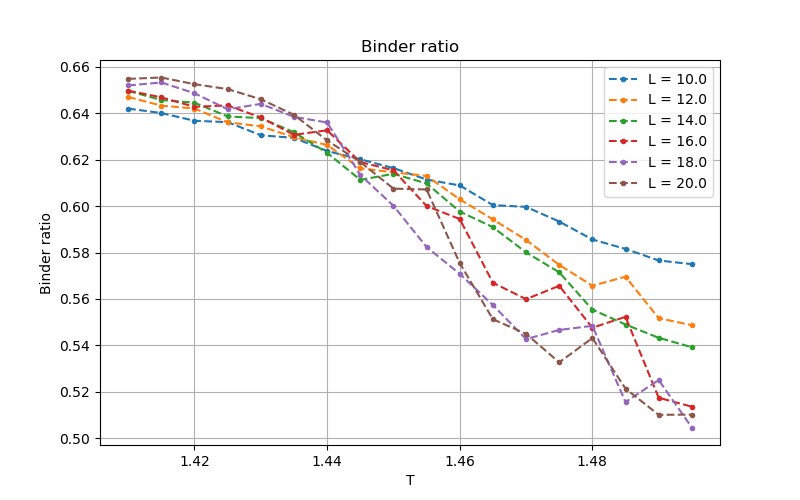

In [33]:
fig = plt.figure(figsize=(8,5))
ax = plt.subplot(111)
for i in np.ndindex(L_num):
    ax.plot(T[11:-11], binder[i][11:-11], '--.', label=f"L = {L[i]}")
box = ax.get_position()
ax.legend()
plt.ylabel(r"Binder ratio")
plt.xlabel(r"T")
plt.title("Binder ratio")
plt.grid()
plt.show()
fig.savefig("plots/"+setname+"_binder_zoomed.svg")

In [34]:
m2 = np.mean(m_magnitude**2, axis=2)
m4 = np.mean(m_magnitude**4, axis=2)
m2E = np.mean(E*m_magnitude**2, axis=2)
m4E = np.mean(E*m_magnitude**4, axis=2)

dbinder = (1-binder)*(E_mean - 2*m2E/m2 + m4E/m4)

<IPython.core.display.Javascript object>


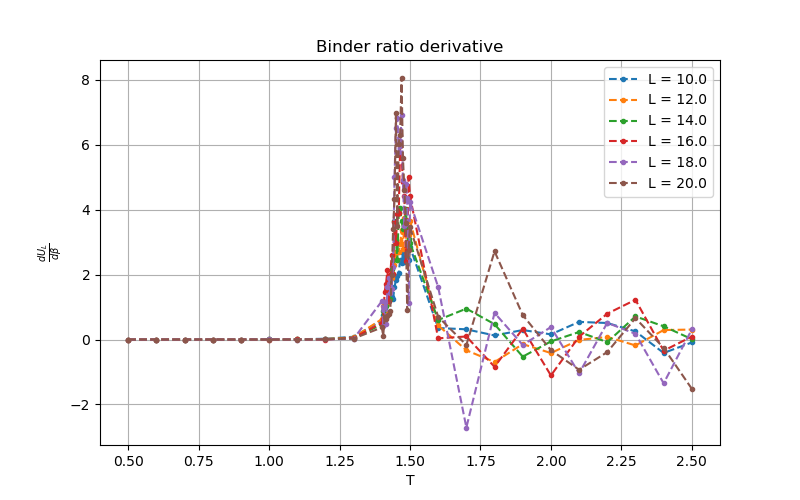

In [35]:
fig = plt.figure(figsize=(8,5))
ax = plt.subplot(111)
for i in np.ndindex(L_num):
    ax.plot(T, dbinder[i], '--.', label=f"L = {L[i]}")
box = ax.get_position()
ax.legend()
plt.ylabel(r"$\frac{d U_L}{d \beta} $")
plt.xlabel(r"T")
plt.title("Binder ratio derivative")
plt.grid()
plt.show()

### Critical indices

In [36]:
slope, intercept, r_value, p_value, std_err = stats.linregress(np.log(L), np.log(chi_zz[:,Tc_idx]))
gamma_nu = slope
gamma_nu_u = std_err

<IPython.core.display.Javascript object>


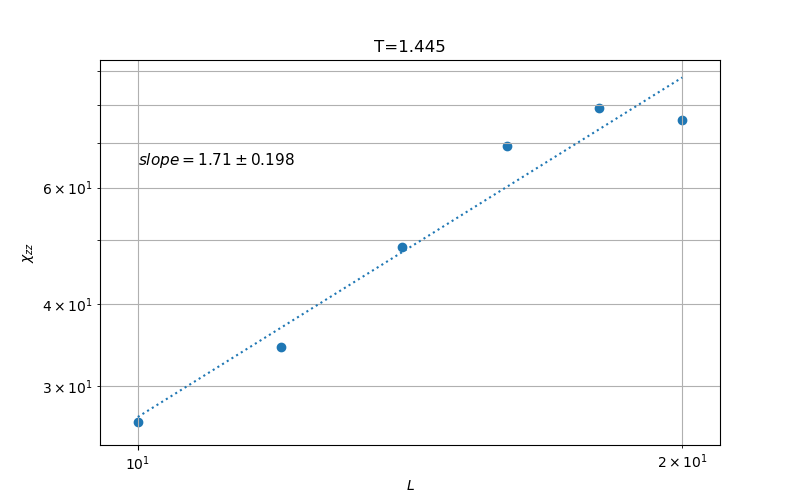

In [37]:
fig = plt.figure(figsize=(8,5))
ax = plt.subplot(111)
ax.set_xscale('log')
ax.set_yscale('log')
plt.scatter(L, chi_zz[:,Tc_idx])
plt.plot(L, np.exp(intercept)*L**(slope), ":")
slope_str="{0:.3}".format(slope)
std_str="{0:.3}".format(std_err)
plt.text(10,65,fr"$slope = {slope_str}\pm{std_str}$", fontsize=11)
plt.grid(True, which="both")
plt.xlabel(r"$L$")
plt.ylabel(r"$\chi_{zz}$")
plt.title(f"T=1.445")
plt.show()
fig.savefig("./plots/"+setname+"_gamma_nu.svg")

In [38]:
print("gamma_nu =", gamma_nu)
print("gamma_nu_u =", gamma_nu_u)

gamma_nu = 1.706539635256909
gamma_nu_u = 0.19836553437862323


In [39]:
slope, intercept, r_value, p_value, std_err = stats.linregress(np.log(L), np.log(m_magnitude_mean[:,Tc_idx]))
beta_nu = -slope
beta_nu_u = std_err

<IPython.core.display.Javascript object>


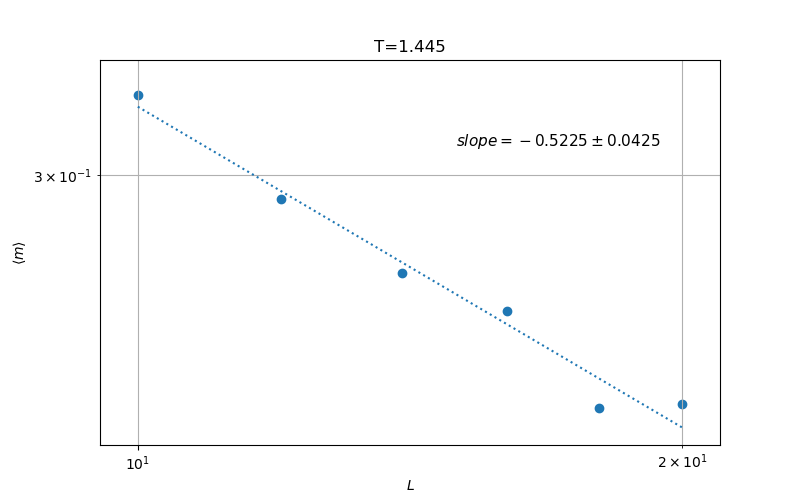

In [40]:
fig = plt.figure(figsize=(8,5))
ax = plt.subplot(111)
ax.set_xscale('log')
ax.set_yscale('log')
plt.scatter(L, m_magnitude_mean[:,Tc_idx])
plt.plot(L, np.exp(intercept)*L**(slope), ":")

slope_str="{0:.4}".format(slope)
std_str="{0:.3}".format(std_err)
plt.text(15,3.1e-1,fr"$slope = {slope_str}\pm{std_str}$", fontsize=11)

plt.grid(True, which="both")
plt.xlabel(r"$L$")
plt.ylabel(r"$\langle m\rangle$")
plt.title(f"T=1.445")
plt.show()
fig.savefig("./plots/"+setname+"_beta_nu.svg")

In [41]:
print("beta_nu =", beta_nu)
print("beta_nu_u =", beta_nu_u)

beta_nu = 0.5225455477549225
beta_nu_u = 0.04245703466221154


In [42]:
slope, intercept, r_value, p_value, std_err = stats.linregress(np.log(L), np.log(dbinder[:,Tc_idx]))
nu = slope
nu_u = std_err

<IPython.core.display.Javascript object>


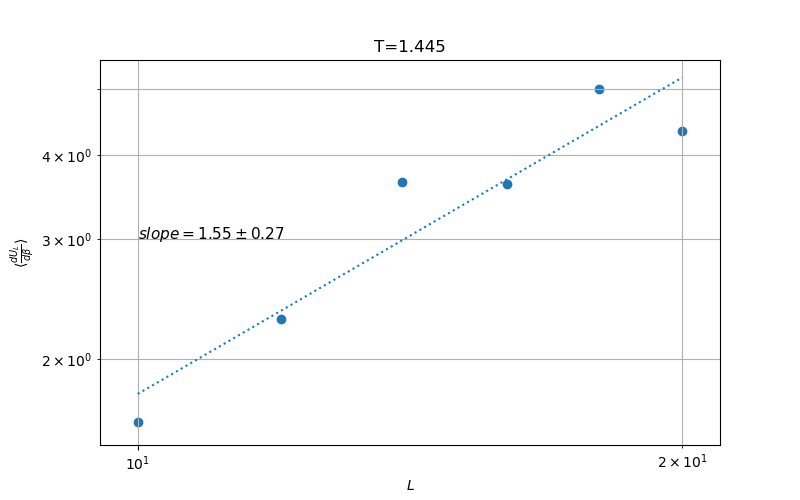

In [43]:
fig = plt.figure(figsize=(8,5))
ax = plt.subplot(111)
ax.set_xscale('log')
ax.set_yscale('log')
plt.scatter(L, dbinder[:,Tc_idx])
plt.plot(L, np.exp(intercept)*L**(slope), ":")

slope_str="{0:.3}".format(slope)
std_str="{0:.3}".format(std_err)
plt.text(10,3,fr"$slope = {slope_str} \pm {std_str}$", fontsize=11)
plt.grid(True, which="both")
plt.xlabel(r"$L$")
plt.ylabel(r"$\langle \frac{d U_L}{d \beta } \rangle$")
plt.title(f"T=1.445")
plt.show()
fig.savefig("./plots/"+setname+"_nu.svg")

In [44]:
print("nu =", nu)
print("nu_u =", nu_u)

nu = 1.550066682541318
nu_u = 0.26996363427440967


In [45]:
gamma = gamma_nu * nu
gamma_u = gamma * np.sqrt((nu_u/nu)**2 + (gamma_nu_u/gamma_nu)**2 )
print("gamma = ", gamma) 
print("gamma_u = ", gamma_u) 

gamma =  2.645250231047948
gamma_u =  0.5538877834901931


In [46]:
beta = beta_nu * nu
beta_u = beta * np.sqrt( (beta_nu_u/beta_nu)**2 + (nu_u/nu)**2 )
print("beta = ", beta) 
print("beta_u = ", beta_u) 

beta =  0.8099804436852086
beta_u =  0.1556643264540276


In [47]:
alpha = 2 - 3 * nu
alpha_u = 3*nu_u
print("alpha = ", alpha) 
print("alpha_u = ", alpha_u) 

alpha =  -2.6502000476239544
alpha_u =  0.8098909028232291


In [48]:
delta = 1 + gamma_nu/beta_nu
delta_u = delta * np.sqrt((gamma_nu_u/gamma_nu)**2 + (beta_nu_u/beta_nu)**2)

In [49]:
print("delta = ", delta) 
print("delta_u = ", delta_u) 

delta =  4.265819874628973
delta_u =  0.6049799883568711


In [50]:
eta = 2 - gamma_nu

In [51]:
print("eta = ", eta) 
print("eta_u = ", gamma_nu_u) 

eta =  0.2934603647430909
eta_u =  0.19836553437862323


## Spatial correlation

In [56]:
r = [[None] * T_num for _ in range(L_num)]
c = [[None] * T_num for _ in range(L_num)]

for i, j in np.ndindex(L_num, T_num):
    r[i][j], c[i][j] = radial_distribution(spatial_correlation_matrix(final_state[i][j]))


/home/skdys/app/anaconda/lib/python3.6/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


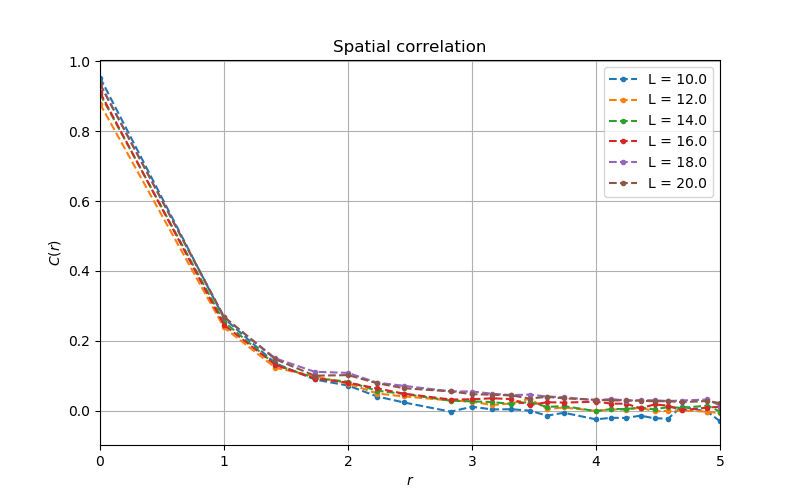

In [78]:
fig = plt.figure(figsize=(8,5))
ax = plt.subplot(111)
for i in range(L_num):
    ax.plot(r[i][Tc_idx],c[i][Tc_idx], '--.', label=f"L = {L[i]}")
ax.legend()
ax.set_xlim([0, 5])
plt.ylabel(r"$C(r)$")
plt.xlabel(r"$r$")
plt.title("Spatial correlation")
plt.grid()
plt.show()
fig.savefig("./plots/"+setname+"_spatial_correlation.svg")



In [79]:
rr = [[None] * T_num for _ in range(L_num)]
cc = [[None] * T_num for _ in range(L_num)]

for i, j in np.ndindex(L_num, T_num):
    rr[i][j] = r[i][j][:6]
    cc[i][j] = c[i][j][:6]

<IPython.core.display.Javascript object>


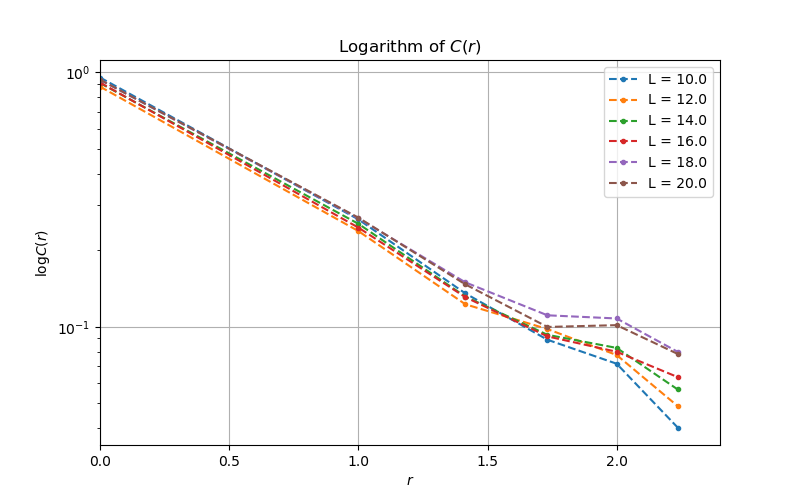

In [80]:
TT = Tc_idx

fig = plt.figure(figsize=(8,5))
ax = plt.subplot(111)
ax.set_xlim([0,2.4])
for i in range(L_num):
    ax.plot(rr[i][TT], cc[i][TT], '--.', label=f"L = {L[i]}")
ax.set_yscale('log')
ax.legend()
plt.ylabel(r"$\log C(r) $")
plt.xlabel(r"$r$")
plt.title(r"Logarithm of $C(r)$")
plt.grid()
plt.show()



In [90]:
slope = np.zeros((L_num, T_num))
intercept = np.zeros((L_num, T_num))
for i,j in np.ndindex(L_num, T_num):
    i = int(i)
    j = int(j)
    slope[i,j], intercept[i,j], r_value, p_value, std_err = stats.linregress(rr[i][j], np.nan_to_num(np.log(cc[i][j])))

/home/skdys/app/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in log
  


In [93]:
slope[0]

array([-1.38442721, -1.57775309, -1.31062009, -1.43907048, -1.28157631,
       -1.39256444, -1.88343898, -1.29247298, -1.5766618 , -1.34576188,
       -1.43026877, -1.48503961, -1.15799514, -1.42064341, -1.50889047,
       -1.2241888 , -1.26492668, -1.14630321, -1.37884326, -1.28165948,
       -1.30503139, -1.24671065, -1.31714365, -1.24851657, -1.21320004,
       -1.21347873, -1.52982351, -1.28542194, -1.28030132, -1.34600305,
       -1.47837531, -1.49964558, -1.41804109, -1.98347126, -1.72747216,
       -1.24942885, -2.6155296 , -1.92246566, -0.85705009, -2.01247843])